In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('HousePricePrediction.xlsx')
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


1	Id	To count the records.

2	MSSubClass	 Identifies the type of dwelling involved in the sale.

3	MSZoning	Identifies the general zoning classification of the sale.

4	LotArea	 Lot size in square feet.

5	LotConfig	Configuration of the lot

6	BldgType	Type of dwelling

7	OverallCond	Rates the overall condition of the house

8	YearBuilt	Original construction year

9	YearRemodAdd	Remodel date (same as construction date if no remodeling or additions).

10	Exterior1st	Exterior covering on house

11	BsmtFinSF2	Type 2 finished square feet.

12	TotalBsmtSF	Total square feet of basement area

13	SalePrice	To be predicted

# EDA

In [3]:
df.shape

(2919, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


<AxesSubplot: >

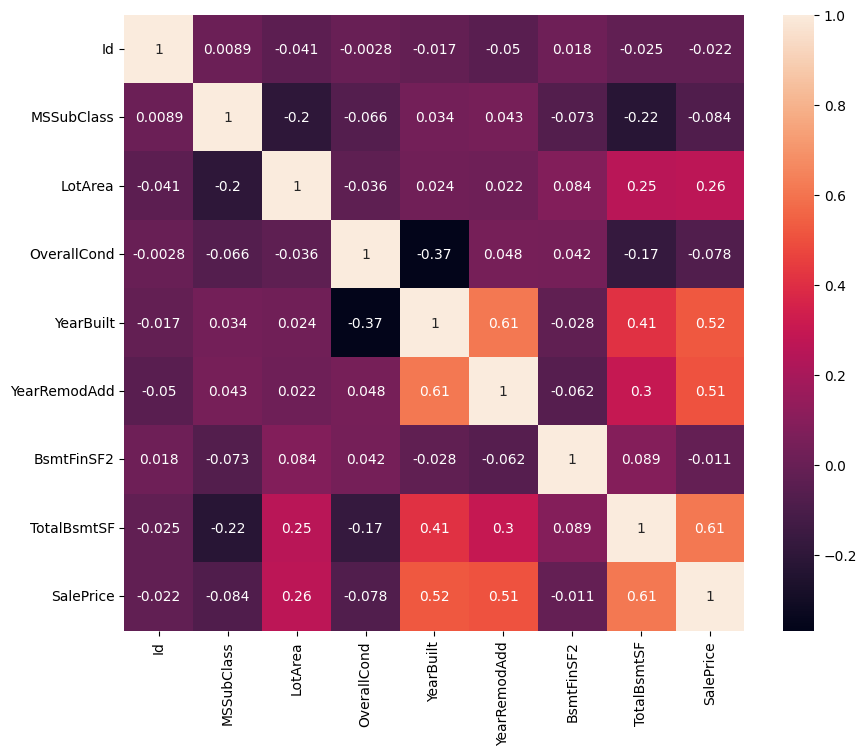

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), color='Blue', annot=True)

In [6]:
#creating copy of Dataset
new_df = df.copy()

In [7]:
new_df.drop('Id', axis=1, inplace=True)

<AxesSubplot: >

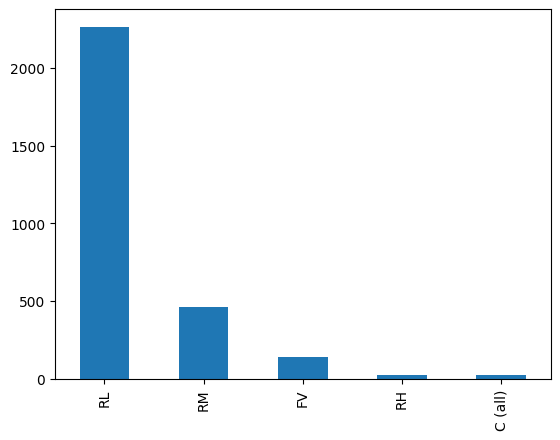

In [8]:
new_df.MSZoning.value_counts().plot(kind='bar')

<AxesSubplot: >

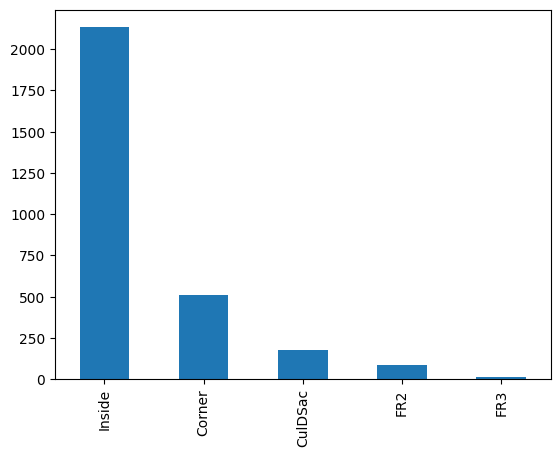

In [9]:
new_df.LotConfig.value_counts().plot(kind='bar')

<AxesSubplot: >

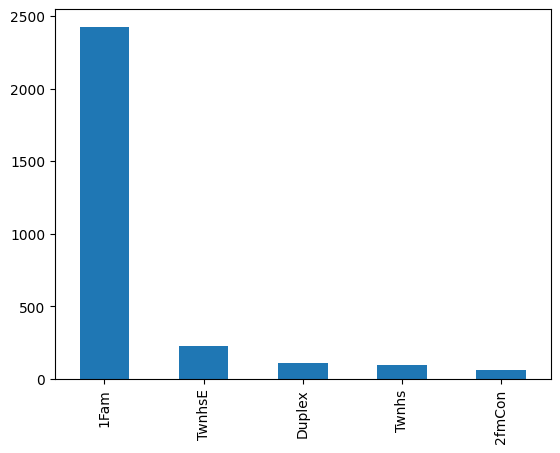

In [10]:
new_df.BldgType.value_counts().plot(kind='bar')

<AxesSubplot: >

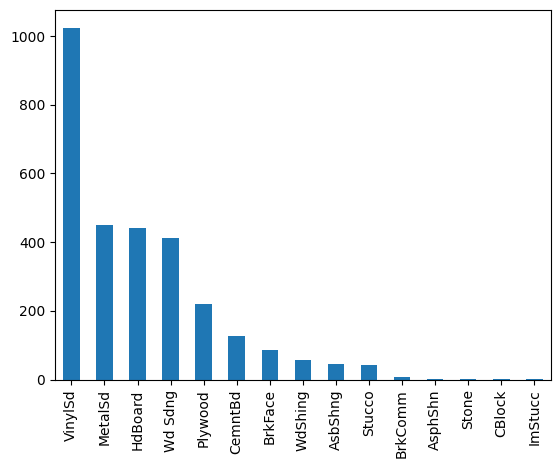

In [11]:
new_df.Exterior1st.value_counts().plot(kind='bar')

In [12]:
#Selecting value which is more than a certain Threshold to reduce Dimensionality When it pass in OneHotEncoder
count = new_df.Exterior1st.value_counts()
other = count[count < 40].index
print(other)
new_df.Exterior1st = new_df.Exterior1st.replace(other, 'Other')

Index(['BrkComm', 'AsphShn', 'Stone', 'CBlock', 'ImStucc'], dtype='object')


In [13]:
new_df.Exterior1st.value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
Other        13
Name: Exterior1st, dtype: int64

<AxesSubplot: xlabel='YearBuilt', ylabel='SalePrice'>

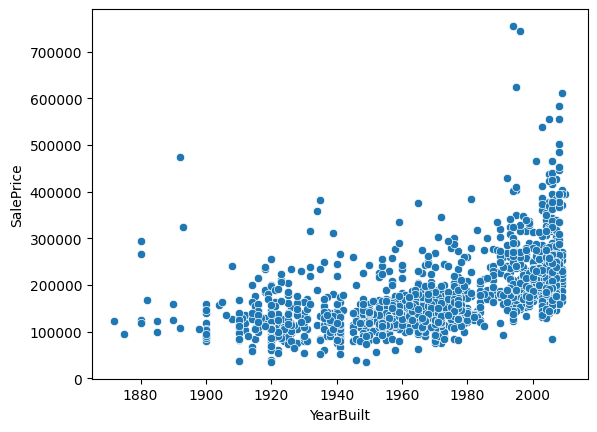

In [14]:
sns.scatterplot(x='YearBuilt', y='SalePrice', data = new_df)

<AxesSubplot: xlabel='YearRemodAdd', ylabel='SalePrice'>

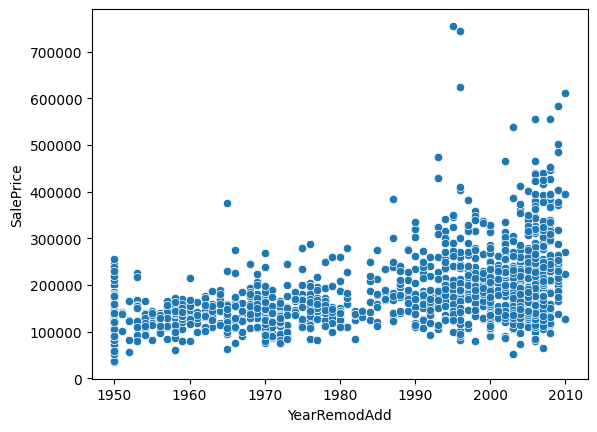

In [15]:
sns.scatterplot(x='YearRemodAdd', y='SalePrice', data=new_df)

In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2919 non-null   int64  
 1   MSZoning      2915 non-null   object 
 2   LotArea       2919 non-null   int64  
 3   LotConfig     2919 non-null   object 
 4   BldgType      2919 non-null   object 
 5   OverallCond   2919 non-null   int64  
 6   YearBuilt     2919 non-null   int64  
 7   YearRemodAdd  2919 non-null   int64  
 8   Exterior1st   2918 non-null   object 
 9   BsmtFinSF2    2918 non-null   float64
 10  TotalBsmtSF   2918 non-null   float64
 11  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 273.8+ KB


In [17]:
# Creating Columns name list to further help in tasks
num_cols = new_df.select_dtypes(np.number).columns.to_list()
cat_cols = new_df.select_dtypes('object').columns.to_list()

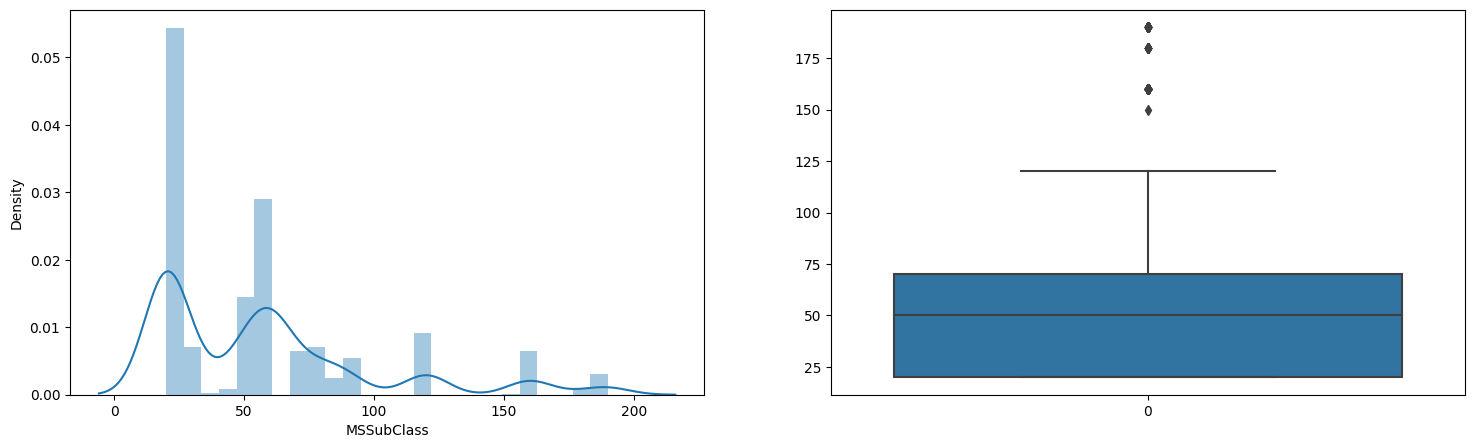

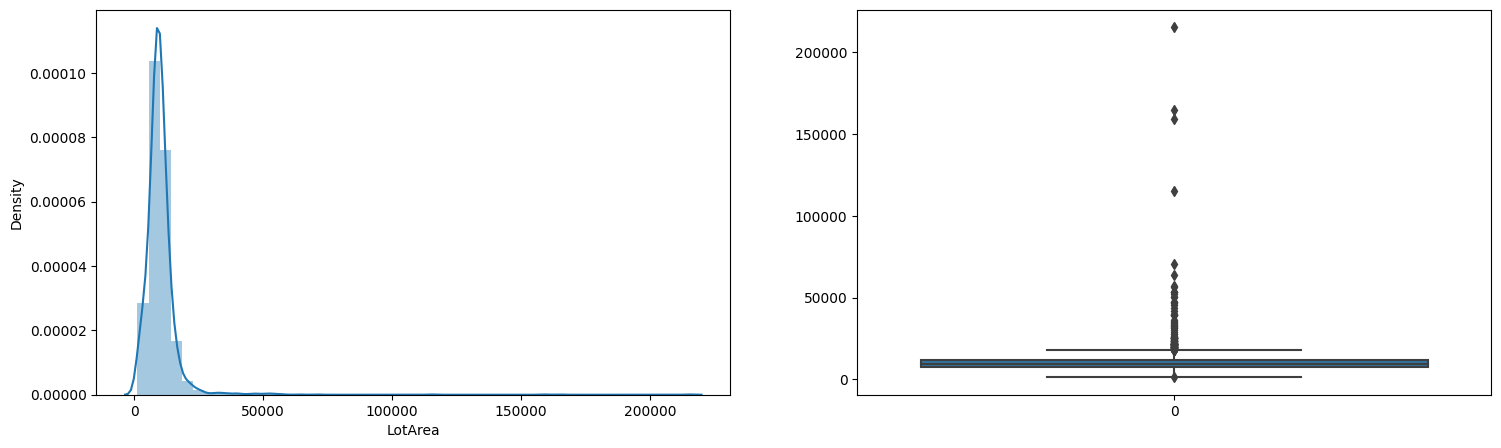

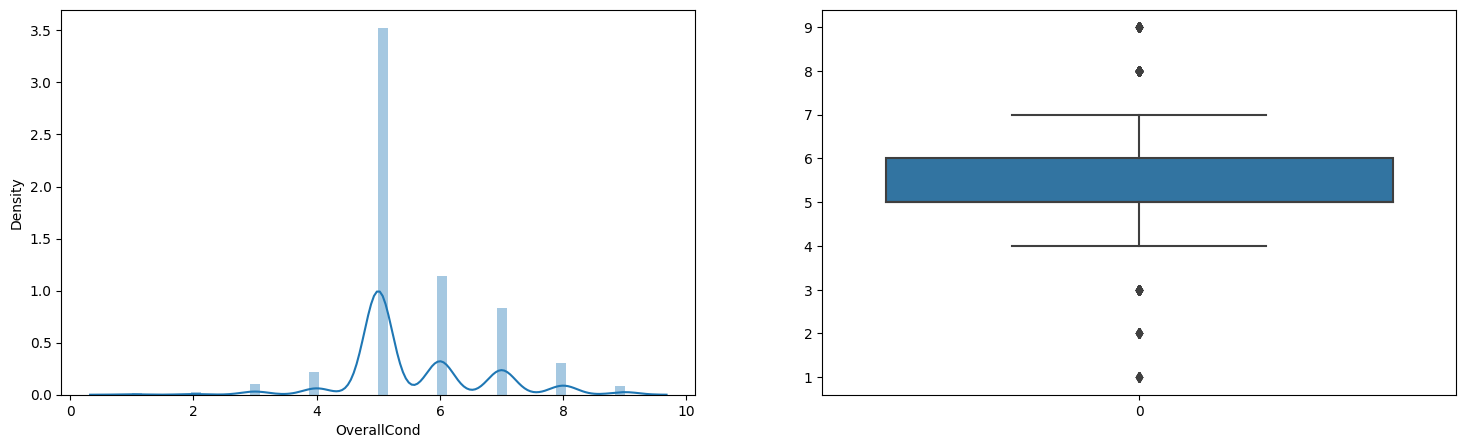

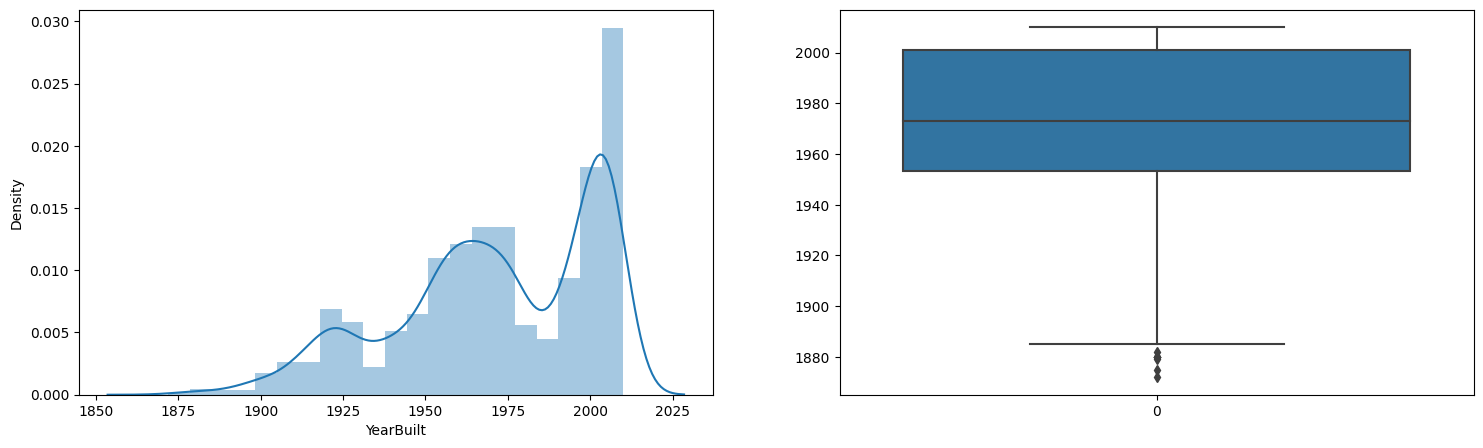

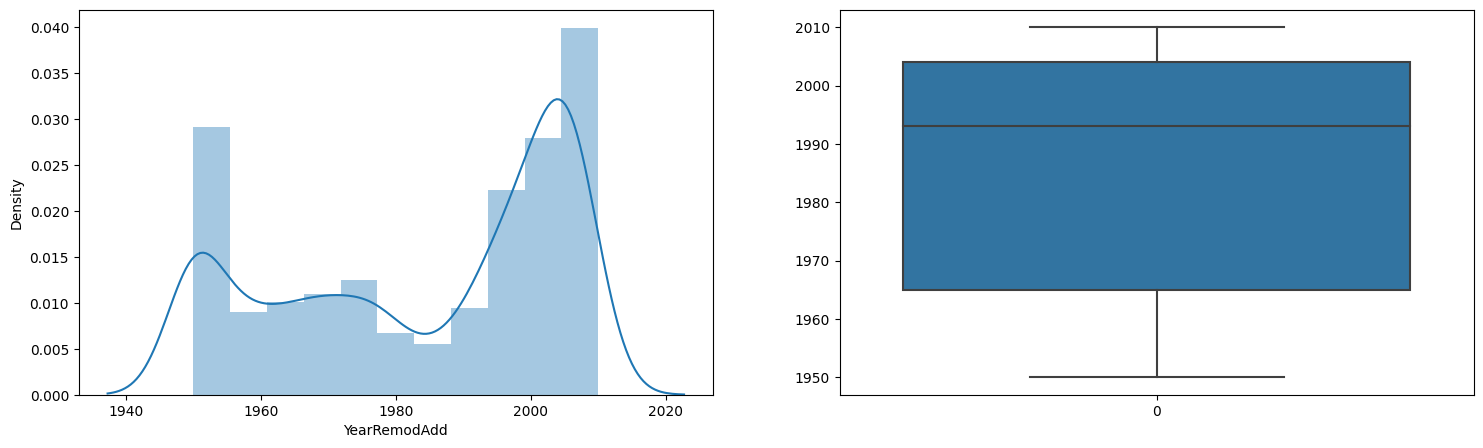

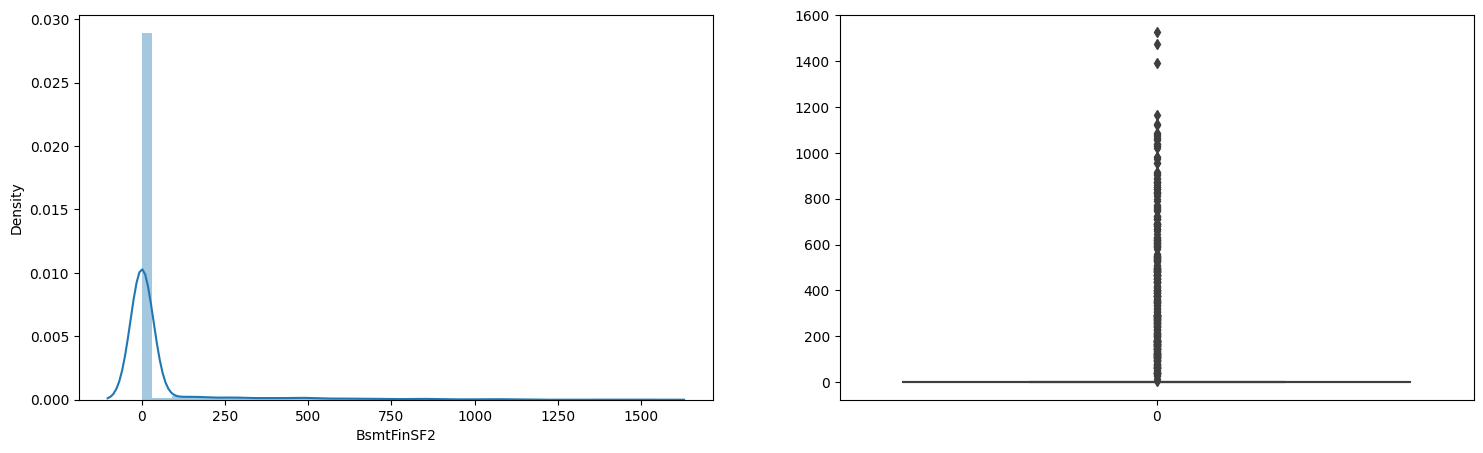

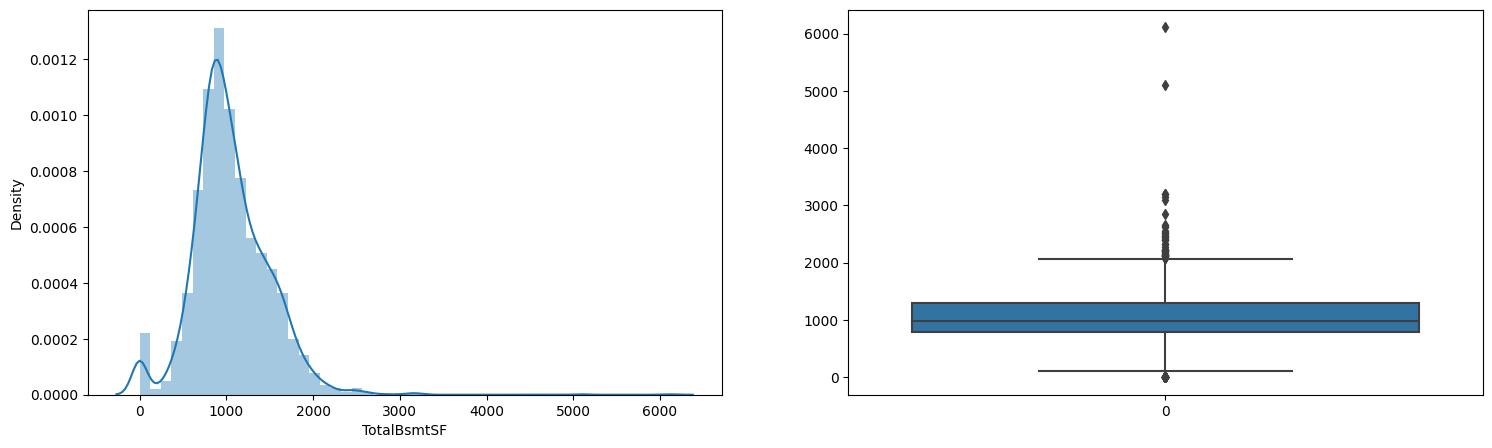

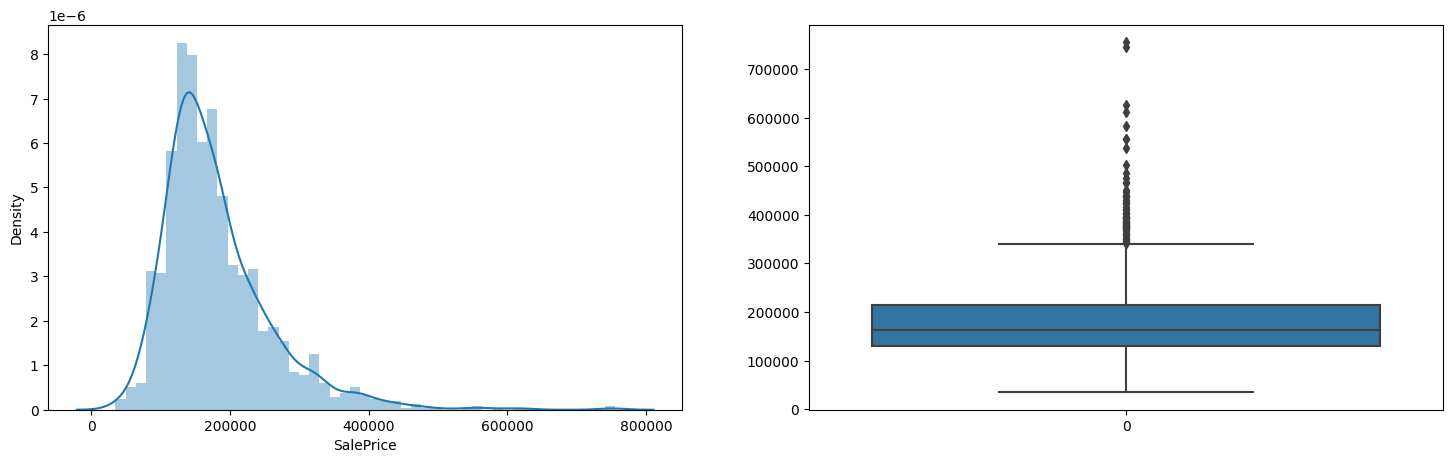

In [18]:
for col in num_cols:
    f = plt.figure(figsize=(18,5))
    ax = f.add_subplot(121)
    sns.distplot(new_df[col])
        
    ax1 = f.add_subplot(122)
    sns.boxplot(new_df[col])

#  Preparing Data for Preprocessing

In [19]:
num_cols.remove('SalePrice')
new_df[num_cols].isna().sum()

MSSubClass      0
LotArea         0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
BsmtFinSF2      1
TotalBsmtSF     1
dtype: int64

In [20]:
new_df.dropna(subset=['BsmtFinSF2', "TotalBsmtSF"], inplace=True, axis=0)

In [21]:
new_df[num_cols].isna().sum()

MSSubClass      0
LotArea         0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
BsmtFinSF2      0
TotalBsmtSF     0
dtype: int64

In [22]:
# Almost Half the dataset is missing Target column so we will use that as the test dataset
test_df = new_df[new_df.SalePrice.isnull()]

In [23]:
test_df

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
1460,20,RH,11622,Inside,1Fam,6,1961,1961,VinylSd,144.0,882.0,NaN
1461,20,RL,14267,Corner,1Fam,6,1958,1958,Wd Sdng,0.0,1329.0,NaN
1462,60,RL,13830,Inside,1Fam,5,1997,1998,VinylSd,0.0,928.0,NaN
1463,60,RL,9978,Inside,1Fam,6,1998,1998,VinylSd,0.0,926.0,NaN
1464,120,RL,5005,Inside,TwnhsE,5,1992,1992,HdBoard,0.0,1280.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [24]:
#removing SalePrice Column and nan rows
test_df.drop('SalePrice', axis=1, inplace=True)
test_df.dropna(axis=0, inplace=True)

In [25]:
new_df = new_df.dropna(subset=['SalePrice'], axis=0)

In [26]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   MSZoning      1460 non-null   object 
 2   LotArea       1460 non-null   int64  
 3   LotConfig     1460 non-null   object 
 4   BldgType      1460 non-null   object 
 5   OverallCond   1460 non-null   int64  
 6   YearBuilt     1460 non-null   int64  
 7   YearRemodAdd  1460 non-null   int64  
 8   Exterior1st   1460 non-null   object 
 9   BsmtFinSF2    1460 non-null   float64
 10  TotalBsmtSF   1460 non-null   float64
 11  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 148.3+ KB


In [27]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 1460 to 2918
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1453 non-null   int64  
 1   MSZoning      1453 non-null   object 
 2   LotArea       1453 non-null   int64  
 3   LotConfig     1453 non-null   object 
 4   BldgType      1453 non-null   object 
 5   OverallCond   1453 non-null   int64  
 6   YearBuilt     1453 non-null   int64  
 7   YearRemodAdd  1453 non-null   int64  
 8   Exterior1st   1453 non-null   object 
 9   BsmtFinSF2    1453 non-null   float64
 10  TotalBsmtSF   1453 non-null   float64
dtypes: float64(2), int64(5), object(4)
memory usage: 136.2+ KB


# Preprocessing

In [28]:
from sklearn.preprocessing import PowerTransformer

In [29]:
transformer = PowerTransformer()
new_df[num_cols] = transformer.fit_transform(new_df[num_cols])

In [30]:
new_df[num_cols]

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF
0,0.493460,-0.141171,-0.477387,1.151867,0.908055,-0.359384,-0.404029
1,-1.164269,0.105609,2.011352,0.006695,-0.621670,-0.359384,0.508177
2,0.493460,0.413721,-0.477387,1.055357,0.835594,-0.359384,-0.253787
3,0.698191,0.095490,-0.477387,-1.629540,-0.863478,-0.359384,-0.644806
4,0.493460,0.877127,-0.477387,1.007861,0.694898,-0.359384,0.254387
...,...,...,...,...,...,...,...
1455,0.493460,-0.266808,-0.477387,0.960863,0.694898,-0.359384,-0.177387
1456,-1.164269,0.722071,0.440551,0.080711,-0.041619,2.782472,1.092127
1457,0.698191,-0.010330,2.698415,-1.061347,1.134227,-0.359384,0.269755
1458,-1.164269,0.129088,0.440551,-0.823991,0.429676,2.783731,0.106028


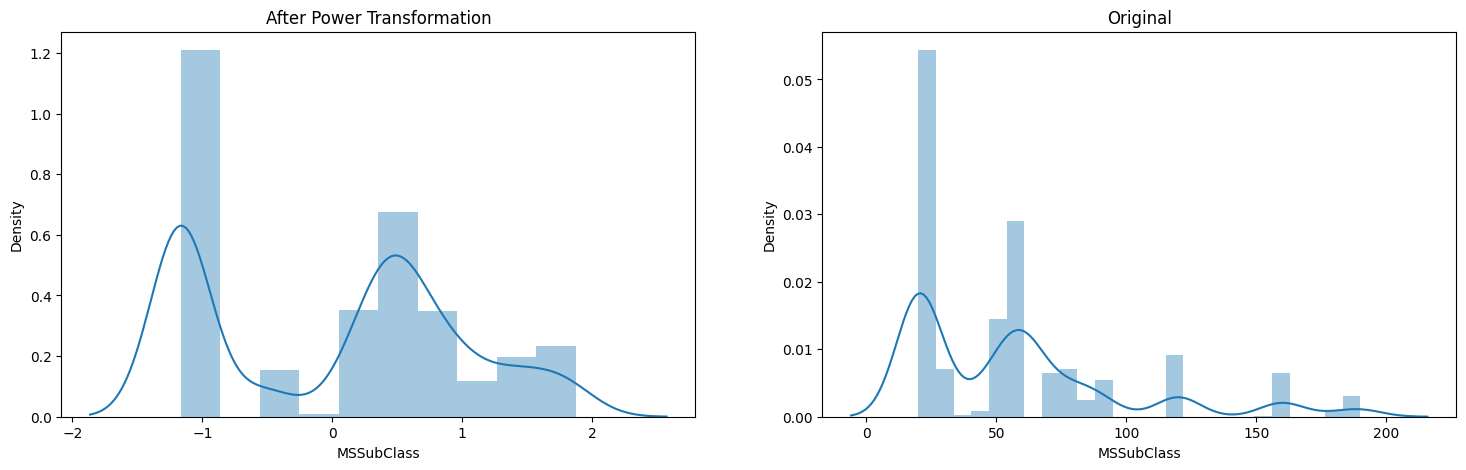

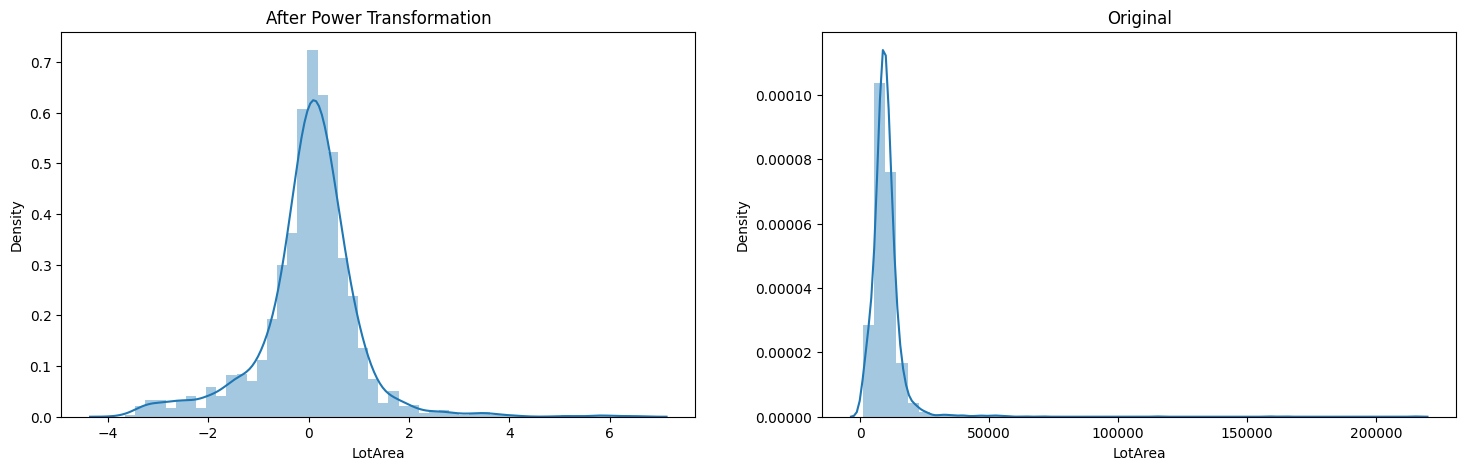

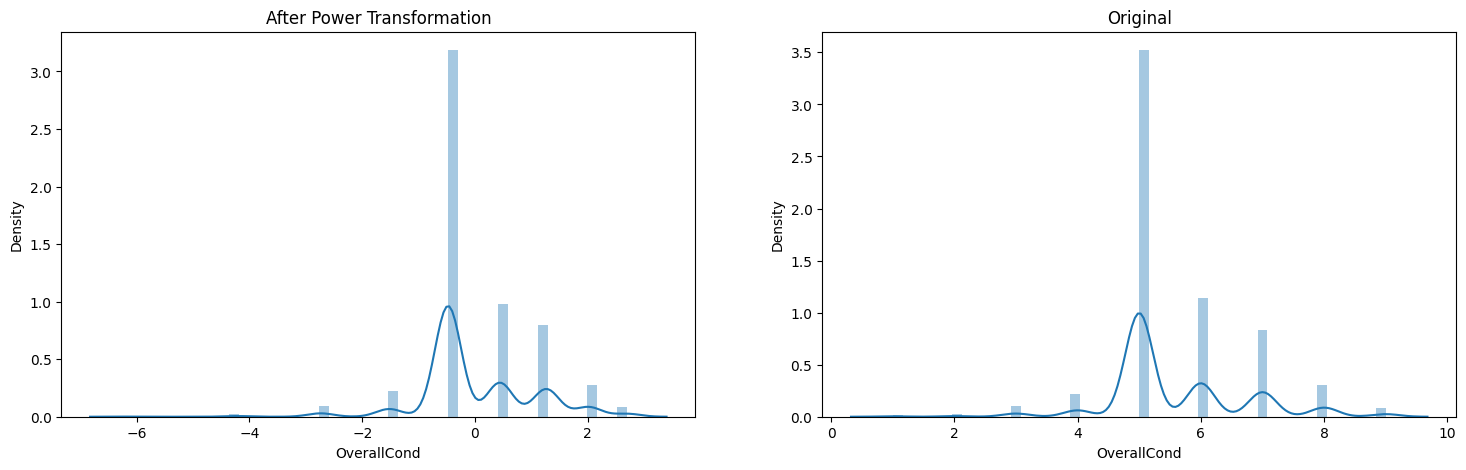

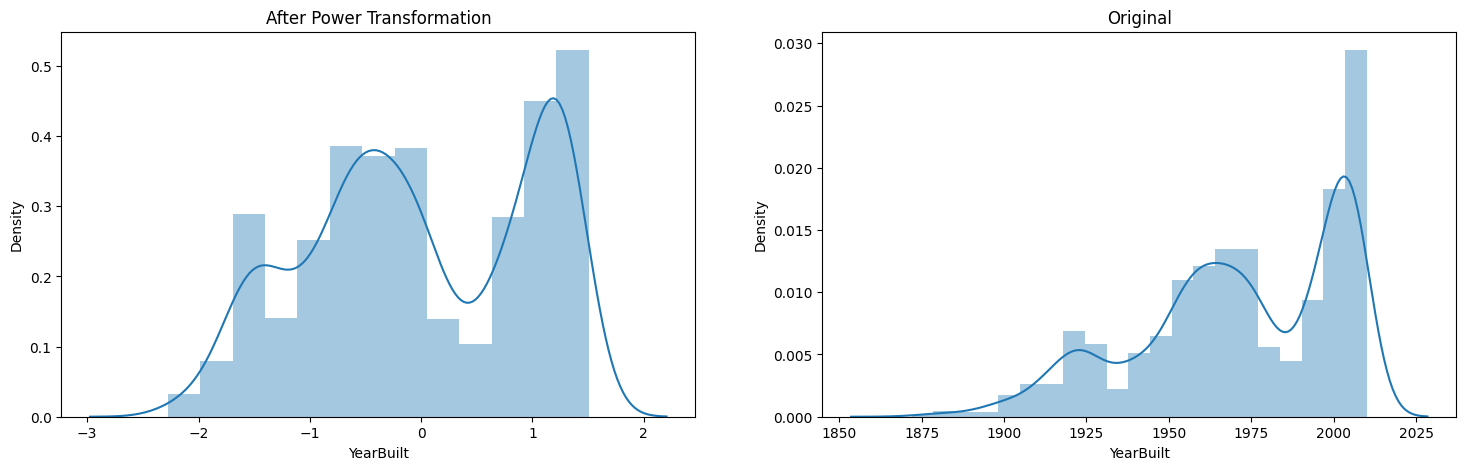

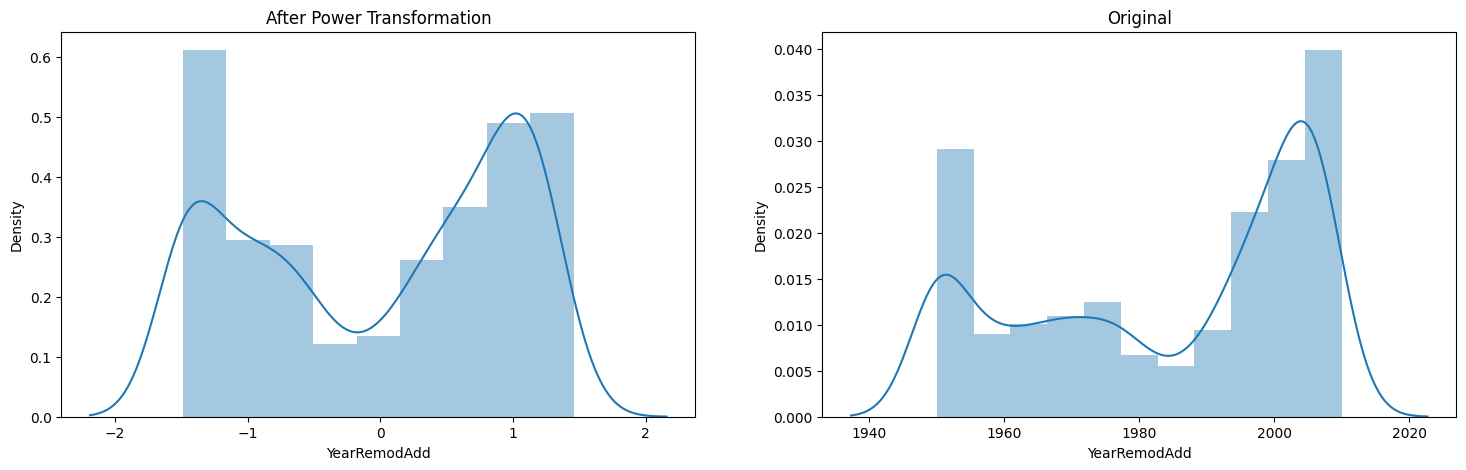

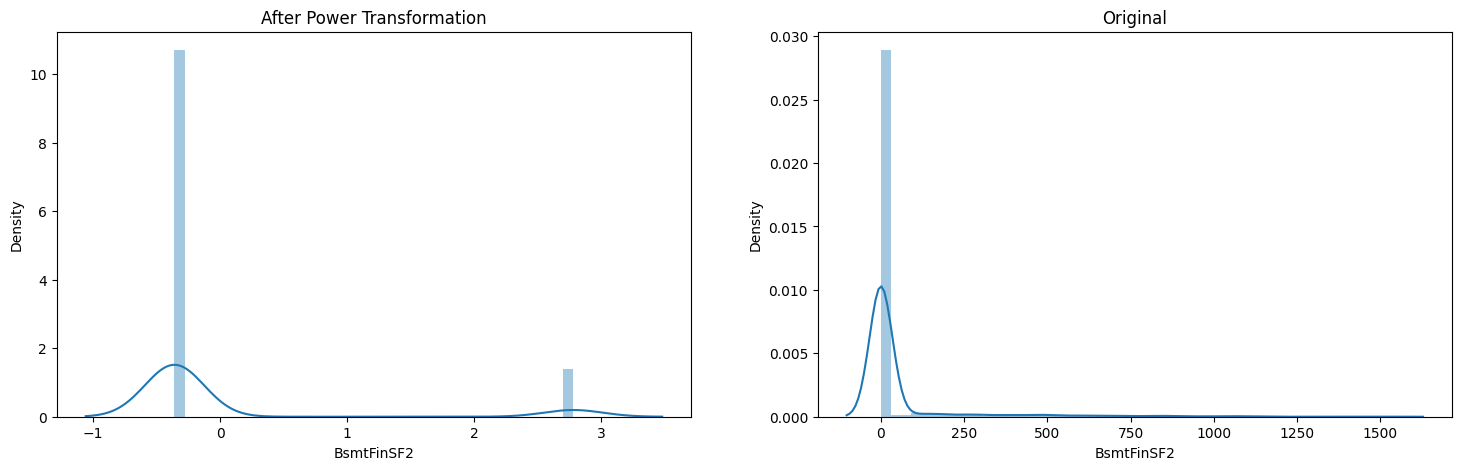

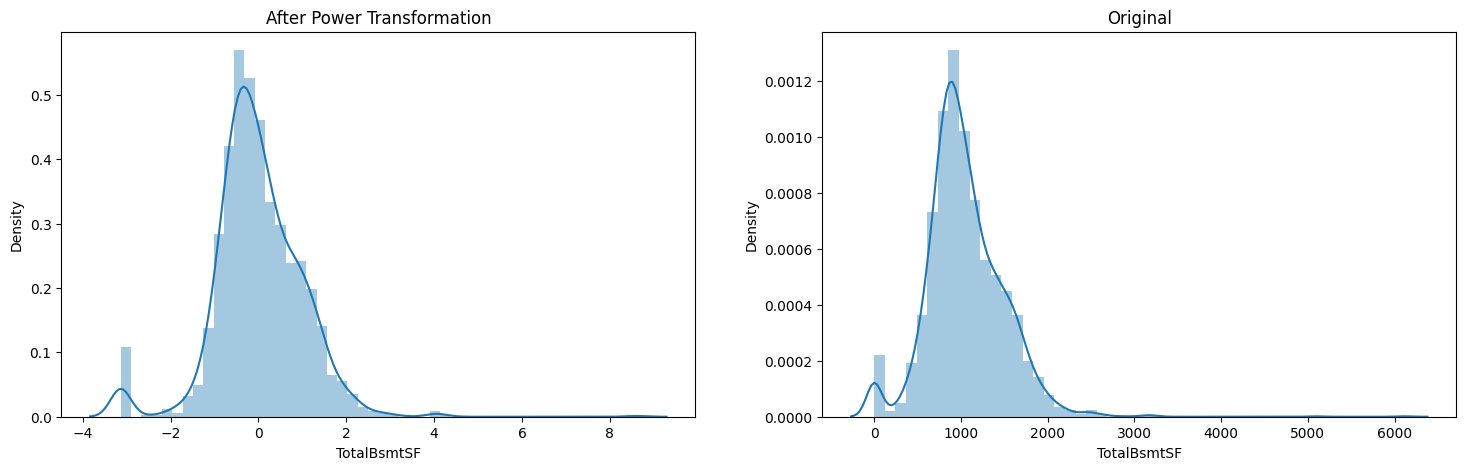

In [31]:
#After and Before normalizing Data
for col in num_cols:
    f = plt.figure(figsize=(18,5))
    ax = f.add_subplot(121)
    sns.distplot(new_df[col])
    plt.title('After Power Transformation')
    
    ax1 = f.add_subplot(122)
    sns.distplot(df[col])
    plt.title('Original')

# 

# One Hot Encoding

In [32]:
from sklearn.preprocessing import  OneHotEncoder

In [33]:
#creating OHE object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

#fitting datset
encoder.fit(new_df[cat_cols])

#Getting encoded Columns name out
encoded_cols = encoder.get_feature_names_out()

# Transforming x datset
new_df[encoded_cols] = encoder.transform(new_df[cat_cols])

#transforming test dataset
test_df[encoded_cols] = encoder.transform(test_df[cat_cols])

In [34]:
new_df

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,...,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0.493460,RL,-0.141171,Inside,1Fam,-0.477387,1.151867,0.908055,VinylSd,-0.359384,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.164269,RL,0.105609,FR2,1Fam,2.011352,0.006695,-0.621670,MetalSd,-0.359384,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.493460,RL,0.413721,Inside,1Fam,-0.477387,1.055357,0.835594,VinylSd,-0.359384,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.698191,RL,0.095490,Corner,1Fam,-0.477387,-1.629540,-0.863478,Wd Sdng,-0.359384,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.493460,RL,0.877127,FR2,1Fam,-0.477387,1.007861,0.694898,VinylSd,-0.359384,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.493460,RL,-0.266808,Inside,1Fam,-0.477387,0.960863,0.694898,VinylSd,-0.359384,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1456,-1.164269,RL,0.722071,Inside,1Fam,0.440551,0.080711,-0.041619,Plywood,2.782472,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1457,0.698191,RL,-0.010330,Inside,1Fam,2.698415,-1.061347,1.134227,CemntBd,-0.359384,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,-1.164269,RL,0.129088,Inside,1Fam,0.440551,-0.823991,0.429676,MetalSd,2.783731,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
test_df

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,...,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
1460,20,RH,11622,Inside,1Fam,6,1961,1961,VinylSd,144.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1461,20,RL,14267,Corner,1Fam,6,1958,1958,Wd Sdng,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1462,60,RL,13830,Inside,1Fam,5,1997,1998,VinylSd,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1463,60,RL,9978,Inside,1Fam,6,1998,1998,VinylSd,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1464,120,RL,5005,Inside,TwnhsE,5,1992,1992,HdBoard,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Splitting Data into Train,Test

In [36]:
x = new_df[num_cols].join(new_df[encoded_cols])
y= new_df['SalePrice']
from sklearn.model_selection import cross_val_score

In [37]:
#Reducing the number of Test Dataset (20% of Training dataset)
test_df = test_df.sample(round(len(x)*20 / 100))
test_df.shape

(292, 37)

# Selecting Best Model

In [38]:
from sklearn.linear_model import LinearRegression , Lasso, Ridge, ElasticNet

In [39]:
def try_model(*args):
    
    for model in models:
        print('Mean Accuracy for {} Model:'.format(model), np.mean(cross_val_score(model, x,y, cv=5)))

In [40]:
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet()]

In [41]:
try_model(models)

Mean Accuracy for LinearRegression() Model: 0.6380703436935177
Mean Accuracy for Ridge() Model: 0.6390262790398693
Mean Accuracy for Lasso() Model: 0.6381762842596245
Mean Accuracy for ElasticNet() Model: 0.5764225945228334


# 

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
model = Ridge()

In [44]:
parameters = {'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'], 'alpha':[0.5,0.9,1.0],
             'max_iter':[1000, 5000, 10000, 15000]}
gridSearch = GridSearchCV(model , parameters)
gridSearch.fit(x,y)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.5, 0.9, 1.0],
                         'max_iter': [1000, 5000, 10000, 15000],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']})

In [45]:
gridSearch.best_params_

{'alpha': 1.0, 'max_iter': 1000, 'solver': 'sparse_cg'}

In [46]:
gridSearch.best_score_

0.6390667145490216

In [47]:
pd.DataFrame(gridSearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007111,0.002386,0.000000,0.000000,0.5,1000,auto,"{'alpha': 0.5, 'max_iter': 1000, 'solver': 'au...",0.687327,0.683567,0.663600,0.659378,0.499254,0.638625,0.070527,73
1,0.008051,0.005530,0.000453,0.000905,0.5,1000,svd,"{'alpha': 0.5, 'max_iter': 1000, 'solver': 'svd'}",0.687327,0.683567,0.663600,0.659378,0.499254,0.638625,0.070527,81
2,0.003125,0.006250,0.003125,0.006250,0.5,1000,cholesky,"{'alpha': 0.5, 'max_iter': 1000, 'solver': 'ch...",0.687327,0.683567,0.663600,0.659378,0.499254,0.638625,0.070527,73
3,0.012552,0.006277,0.000000,0.000000,0.5,1000,lsqr,"{'alpha': 0.5, 'max_iter': 1000, 'solver': 'ls...",0.687378,0.683602,0.663557,0.659501,0.499373,0.638682,0.070496,57
4,0.009375,0.007654,0.003125,0.006251,0.5,1000,sparse_cg,"{'alpha': 0.5, 'max_iter': 1000, 'solver': 'sp...",0.687378,0.683539,0.663574,0.659503,0.499308,0.638660,0.070515,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.012499,0.006250,0.000000,0.000000,1.0,15000,lsqr,"{'alpha': 1.0, 'max_iter': 15000, 'solver': 'l...",0.687214,0.684326,0.663473,0.660082,0.500214,0.639062,0.070262,5
92,0.009374,0.007654,0.003125,0.006250,1.0,15000,sparse_cg,"{'alpha': 1.0, 'max_iter': 15000, 'solver': 's...",0.687213,0.684301,0.663487,0.660080,0.500253,0.639067,0.070244,1
93,0.053123,0.015934,0.000000,0.000000,1.0,15000,sag,"{'alpha': 1.0, 'max_iter': 15000, 'solver': 's...",0.687168,0.684326,0.663507,0.660025,0.500142,0.639034,0.070283,15
94,0.118745,0.032174,0.003125,0.006250,1.0,15000,saga,"{'alpha': 1.0, 'max_iter': 15000, 'solver': 's...",0.687165,0.684335,0.663506,0.660058,0.500148,0.639042,0.070284,12


# Final Model

In [48]:
model = Ridge(alpha=1, max_iter=5000, solver='saga')
model.fit(x, y)
print('Training Accuracy:', model.score(x,y))

Training Accuracy: 0.6531417135125572


In [49]:
#predictions
test_df = test_df[num_cols].join(test_df[encoded_cols])
Test_predict = model.predict(test_df)
Test_predict

array([2.06778171e+08, 3.37635406e+08, 1.44365987e+08, 4.17888356e+08,
       3.17632170e+08, 3.74678039e+08, 3.19845695e+08, 3.47006940e+08,
       3.71339400e+08, 2.93613233e+08, 4.96511753e+08, 2.21631763e+08,
       2.23255863e+08, 4.68674926e+08, 3.95318995e+08, 2.69035340e+08,
       3.32070297e+08, 4.48437807e+08, 3.51980186e+08, 4.75664277e+08,
       2.92091355e+08, 3.11047848e+08, 2.68469041e+08, 3.68635016e+08,
       4.43730933e+08, 2.89126951e+08, 1.03166642e+09, 4.62174065e+08,
       4.02153557e+08, 4.16606353e+08, 3.56369516e+08, 3.12648519e+08,
       3.58780336e+08, 3.44305117e+08, 4.02948181e+08, 2.86879591e+08,
       3.10972289e+08, 4.06467240e+08, 2.31963878e+08, 1.40204753e+08,
       4.24560656e+08, 3.37220261e+08, 2.53428295e+08, 3.60391930e+08,
       4.39215008e+08, 2.88822246e+08, 3.13624871e+08, 3.42021044e+08,
       2.83797587e+08, 2.16525460e+08, 3.43274277e+08, 3.38795278e+08,
       2.82966550e+08, 2.69352479e+08, 2.88140489e+08, 3.44093218e+08,
      